In [1]:
cd Desktop

C:\Users\hp\Desktop


In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
filename = 'ex2data1.txt'
names = ['exam1', 'exam2','admitted']
data = pd.read_csv(filename, names = names)
data.head()

,exam1,exam2,admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


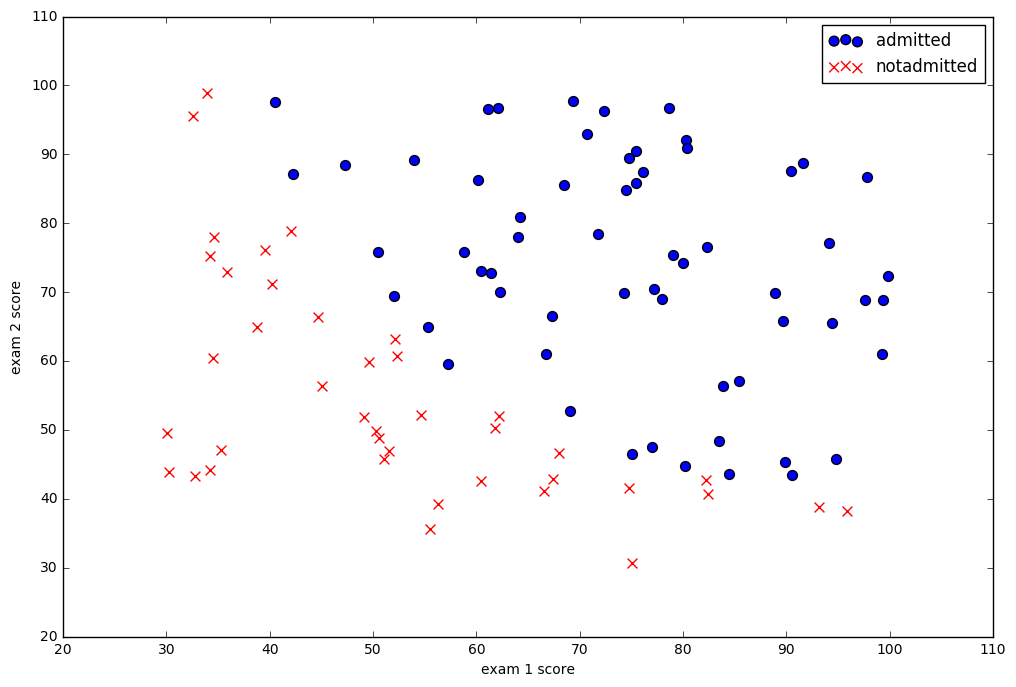

In [4]:
positive = data[data['admitted'].isin([1])]
negative = data[data['admitted'].isin([0])]

fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['exam1'], positive['exam2'], s= 50, c ='b', marker = 'o', label ='admitted' )
ax.scatter(negative['exam1'], negative['exam2'], s= 50, c ='r', marker = 'x', label ='notadmitted')
ax.legend()
ax.set_xlabel('exam 1 score')
ax.set_ylabel('exam 2 score')
plt.show()

In [5]:
def sigmoid(z) :
    return 1/(1+np.exp(-z))


In [32]:
def cost(theta,X,y) :
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(y)
    
    first =  np.multiply(-y,np.log(sigmoid(X*theta.T)))
    second = np.multiply(-(1-y),np.log(1 - sigmoid(X*theta.T)))

    return np.sum(first+second)/m

In [52]:
data.insert(0,'ones',1)
X = data.iloc[:,0:3]
y = data.iloc[:,3:4]

print(X.shape[1])
print(y.shape[1])

X = np.array(X.values)
y = np.array(y.values)
theta = np.zeros(3)
print(theta)

print(X.shape,y.shape,theta.shape)

ValueError: cannot insert ones, already exists

In [34]:
print(cost(theta,X,y))

0.69314718056


In [17]:
print(theta)

  

[ 0.  0.  0.]


In [50]:
import scipy.optimize as opt
result = opt.fmin(cost, x0=theta, args = (X,y), maxiter = 400,full_output = True)
print(result[0])
print(result[1])


Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287
[-25.16130062   0.20623142   0.20147143]
0.20349770159


In [51]:
print(cost(result[0],X,y))

0.20349770159


In [61]:
theta_min = np.matrix(result[0])
print(theta_min)
    

[[-25.16130062   0.20623142   0.20147143]]


In [88]:
def predict(theta_min,X):
    prob = sigmoid(X*theta_min.T)
    return [1 if X >= 0.5 else 0 for X in prob]

    
  
    
    

In [99]:
predictions = predict(theta_min, X)

count = 0
for (a,b) in zip(predictions,y) :
    if (a == 1 and b==1) or (a==0 and b == 0):
        count = count+1


accuracy = (count/100)*100
print(accuracy)        

89.0
